In [1]:
import pickle
import pandas as pd

pd.set_option("display.max_colwidth", 100)

In [4]:
with open("../output/stats/qald9-train-count_dict.pkl", "rb") as f:
    count_dict_train = pickle.load(f)
with open("../output/stats/qald9-train-answers_dict.pkl", "rb") as f:
    answers_dict_train = pickle.load(f)

with open("../output/stats/qald9-test-count_dict.pkl", "rb") as f:
    count_dict_test = pickle.load(f)
with open("../output/stats/qald9-test-answers_dict.pkl", "rb") as f:
    answers_dict_test = pickle.load(f)

count_dict = count_dict_train
for key in count_dict_train.keys():
    try:
        count_dict[key] += count_dict_test[key]
    except KeyError:
        pass
count_dict

{'uri': 312,
 'empty': 106,
 'number': 63,
 'date': 21,
 'literal': 15,
 'boolean': 41}

In [5]:
count_df = pd.DataFrame.from_dict(
    count_dict, orient="index", columns=["count"]
).sort_values(by="count", ascending=False)
count_df

,count
uri,312
empty,106
number,63
boolean,41
date,21
literal,15


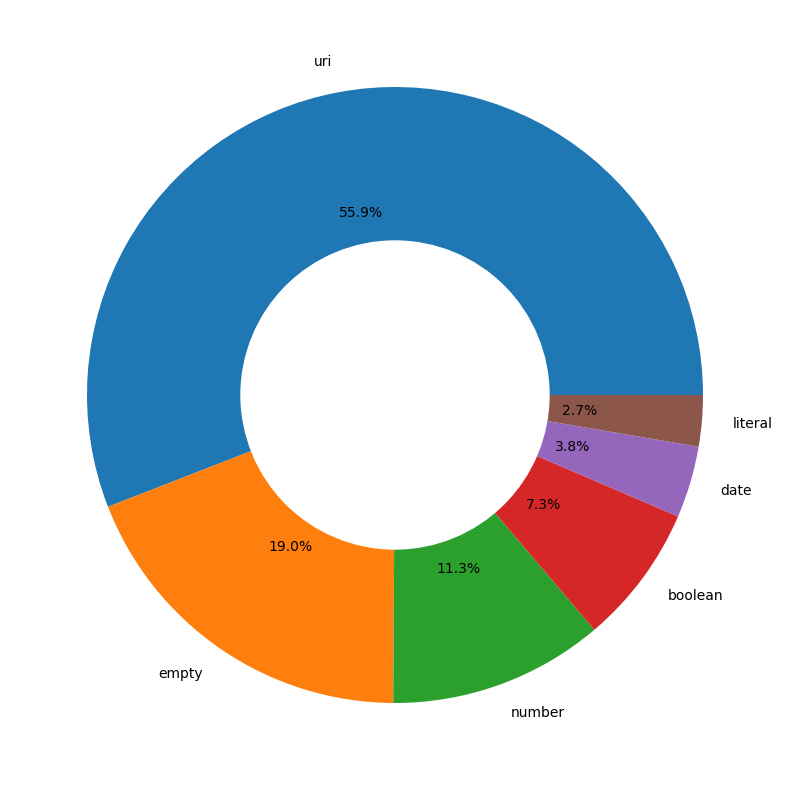

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# donut chart
plt.pie(count_df["count"], labels=count_df.index, autopct="%1.1f%%")
# draw circle in the middle
circle = plt.Circle((0, 0), 0.5, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.savefig(
    "../figures/stats/qald9-answers_pie.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()

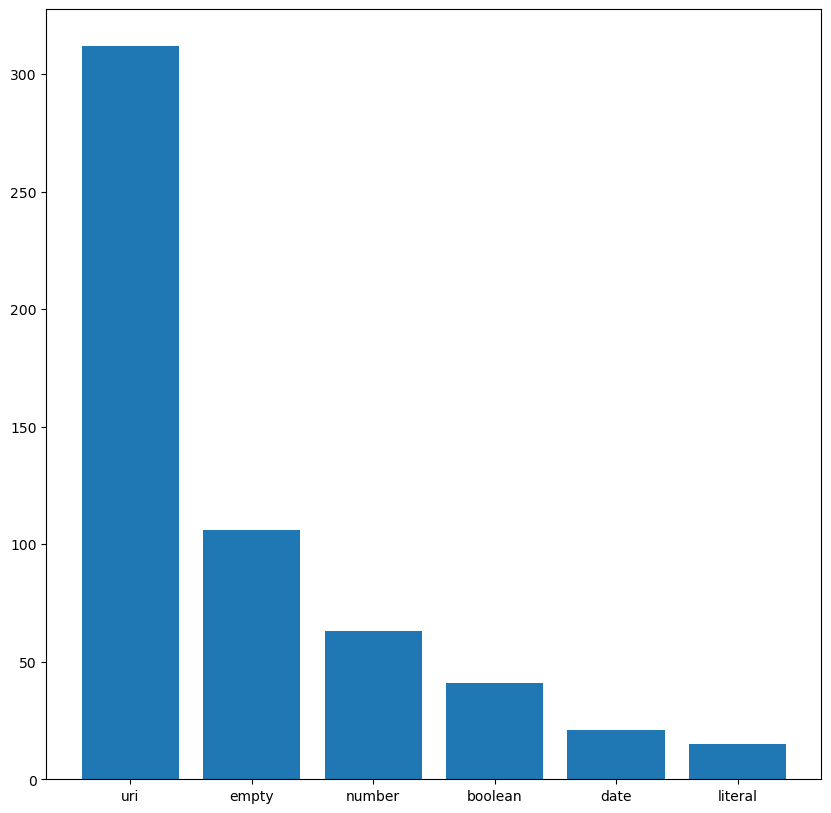

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.bar(
    count_df.index,
    count_df["count"],
)
plt.savefig(
    "../figures/stats/qald9-answers_bar.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()